# Lab report coding - Sebastian and Ivar

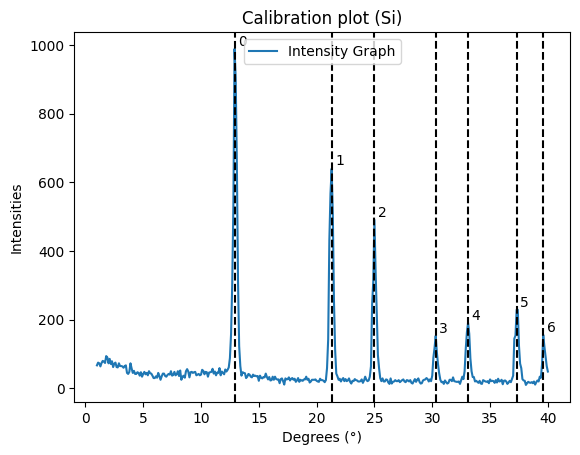

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


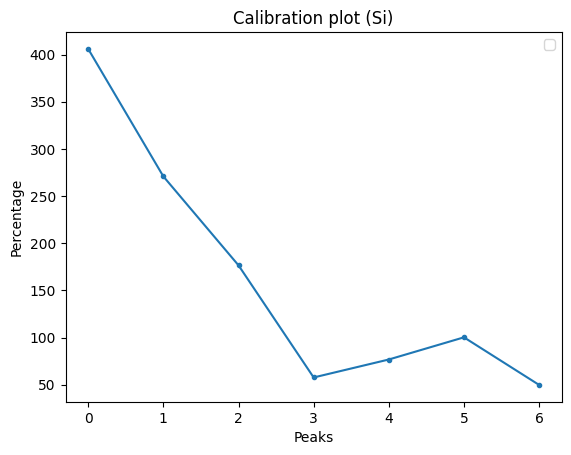

3 First  D-spacings:
 Calibration D-spacings: 
    D-spacing: 3.1771540041000734, angle: 12.9, intensity = 100.0
    D-spacing: 1.9526430759131692, angle: 21.3, intensity = 66.70772262593914
    D-spacing: 1.6783467829300673, angle: 25.0, intensity = 43.49057765734706
Now finding difference in angle compared to the expected peaks. We need this to see if there is a trend with wrong angles. If there is a consistant shift in the angles from the 'real'/'proper' ones retrieved in webmineral we will shift all values for the unknown sample degrees by a this trend.
  Difference: -0.09999999999999964
  Difference: 0.0
  Difference: 0.10000000000000142
No difference found


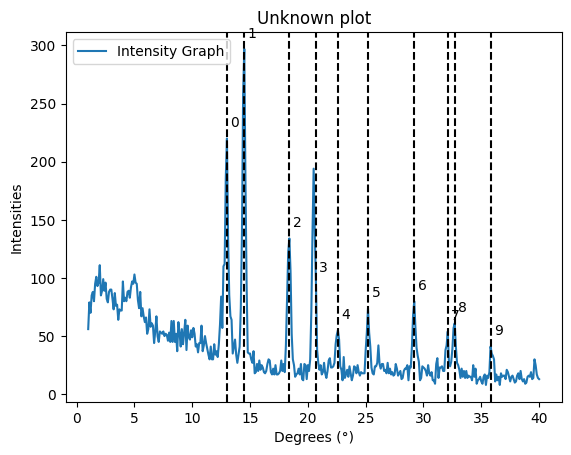

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


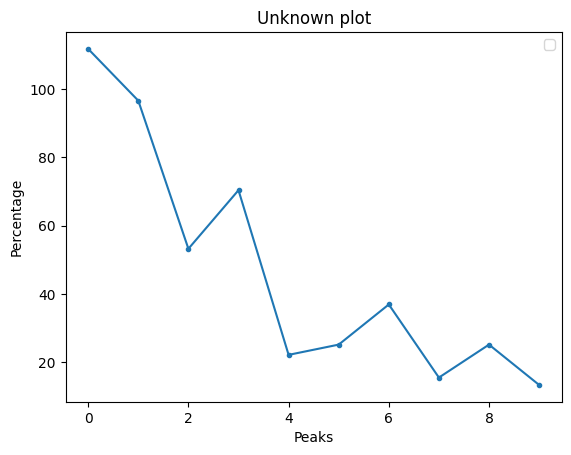

3 First  D-spacings:
 Unknown sample even peak D-spacings: 
    D-spacing: 3.1771540041000734, angle: 12.9, intensity = 100.0
    D-spacing: 1.6783467829300673, angle: 25.0, intensity = 43.49057765734706
    D-spacing: 1.29884170106699, angle: 33.1, intensity = 18.893952457199227
 Unknown sample odd peak D-spacings: 
    D-spacing: 1.9526430759131692, angle: 21.3, intensity = 100.0
    D-spacing: 1.405869503510196, angle: 30.3, intensity = 21.28877400295423
    D-spacing: 1.1704844510043253, angle: 37.3, intensity = 37.0014771048745


In [1]:
import numpy as np
import matplotlib.pyplot as plt

wavelength = 0.70930

data_calibration = np.genfromtxt("Calibration Si.txt")
data_calibration_degs = data_calibration[0:, 0]
data_calibration_vals = data_calibration[0:, 1]
data_unknown = np.genfromtxt("Unknown sample.txt")
data_unknown_degs = data_unknown[0:, 0]
data_unknown_vals = data_unknown[0:, 1]

# (start, end, peak)
peaks_calibration= [(115, 124, 119), (199, 207, 203), (237, 244, 240), (290, 296, 293), (318, 324, 321), (360, 367, 363), (385, 390, 386)]
peaks_unknown = [(114, 124, 120), (132, 137, 135), (171, 177, 174), (192, 199, 197), (213, 218, 216), (240, 245, 242), (278, 286, 282), (309, 313, 311), (314, 320, 317), (347, 351, 348)  ]


def plot_sample(title, degs, vals, peaks):
  plt.figure()
  plt.plot(degs, vals, "-", label = "Intensity Graph")
  plt.xlabel('Degrees (°)')
  plt.ylabel('Intensities')
  plt.title(title)
  plt.legend()

  for i in range(len(peaks)):
    peak = peaks[i]
    xval = degs[peak[2]]
    yval = vals[peak[2]]
    plt.axvline(x=xval, color='black', linestyle='--', label = f"{i}: ")
    plt.text(xval+0.3, yval + 10, f'{i}')
  plt.show()

  plt.figure()
  plt.xlabel('Peaks')
  plt.ylabel('Percentage')
  plt.title(title)
  plt.legend()
  intensities = np.zeros(len(peaks))
  for i in range(len(peaks)):
    peak = peaks[i]
    x_section = degs[peak[0]:peak[1]+1]
    y_section = vals[peak[0]:peak[1]+1]
    # Use numpy's trapz function to calculate the area under the curve
    intensities[i] = np.trapz(y_section, x=x_section)
  plt.plot(intensities, ".-", label = "Intensity Distribution")
  plt.show()
  d_spacing = np.zeros(len(peaks))
  for i in range(len(peaks)):
    d_spacing[i] = 1 * wavelength / np.sin(np.deg2rad(degs[peaks[i][2]]))
  return intensities, d_spacing
intensities_calibration, d_spacing_calibration = plot_sample("Calibration plot (Si)", data_calibration_degs, data_calibration_vals, peaks_calibration)
print("3 First  D-spacings:")
print(" Calibration D-spacings: ")
for i in range(3):
  print(f"    D-spacing: {d_spacing_calibration[i]}, angle: {data_calibration_degs[peaks_calibration[i][2]]}, intensity = {intensities_calibration[i] / intensities_calibration[0] * 100}")
print("Now finding difference in angle compared to the expected peaks. We need this to see if there is a trend with wrong angles. If there is a consistant shift in the angles from the 'real'/'proper' ones retrieved in webmineral we will shift all values for the unknown sample degrees by a this trend.")
expected = [13.00, 21.3, 24.9]
for i in range(3):
  print(f"  Difference: {data_calibration_degs[peaks_calibration[i][2]] - expected[i]}")
print("No difference found")
intensities_unknown, d_spacing_unknown = plot_sample("Unknown plot", data_unknown_degs, data_unknown_vals, peaks_unknown)

print("3 First  D-spacings:")
print(" Unknown sample even peak D-spacings: ")
for i in range(0, 5, 2):
  print(f"    D-spacing: {d_spacing_calibration[i]}, angle: {data_calibration_degs[peaks_calibration[i][2]]}, intensity = {intensities_calibration[i] / intensities_calibration[0] * 100}")
print(" Unknown sample odd peak D-spacings: ")
for i in range(1, 6, 2):
  print(f"    D-spacing: {d_spacing_calibration[i]}, angle: {data_calibration_degs[peaks_calibration[i][2]]}, intensity = {intensities_calibration[i] / intensities_calibration[1] * 100}")